In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
train_df = pd.read_csv("train_titanic.csv")

In [10]:
test_df = pd.read_csv("test_titanic.csv")

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print('The number of samples in the train data is {}'.format(train_df.shape[0]))

The number of samples in the train data is 891


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
print('The number of samples in the train data is {}'.format(test_df.shape[0]))

The number of samples in the train data is 418


In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

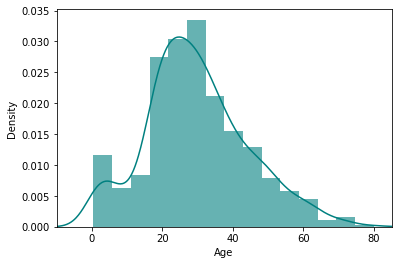

In [16]:
### Now the above missing values need to be filled using the calculated mean value
ax = train_df["Age"].hist(bins = 15, density=True, stacked= True, color = 'teal',alpha=0.6)

train_df["Age"].plot(kind='density', color='teal')
              
ax.set(xlabel='Age')              
plt.xlim(-10,85)
plt.show()


### Median is used to impute the missing values

In [17]:
## Mean of the Age

print('The mean of the Age is : %2f'%(train_df["Age"].mean(skipna= True)))

## Median of the Age
print('The median of the Age is : %2f'%(train_df["Age"].median(skipna= True)))

The mean of the Age is : 29.699118
The median of the Age is : 28.000000


In [18]:
## Percentage of cabin
print('Percentage of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Cabin" records is 77.10%


In [19]:
##############>>>>>>>>>>>>>>> We notice that there are 77% of the values are missing so therefore there is no point in imputing them

In [20]:
### Percentage of missing "Embarked" 
print('Percentage of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Embarked" records is 0.22%


In [21]:
#### Port of Embarkation
print('Boarded passengers grouped by port of embarkation(C = Cherbourg, Q = Queenstopwn,S = Southhampton):')


Boarded passengers grouped by port of embarkation(C = Cherbourg, Q = Queenstopwn,S = Southhampton):


S    644
C    168
Q     77
Name: Embarked, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

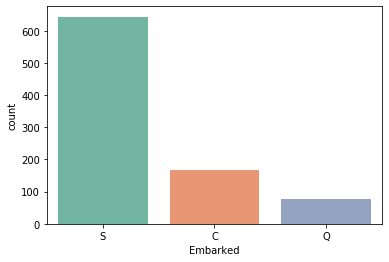

In [22]:
print(train_df["Embarked"].value_counts())
import seaborn as sns
sns.countplot(x='Embarked', data= train_df,palette = 'Set2')
plt.show

In [23]:
print('The most common boarding port of Embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of Embarkation is S.


In [24]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace = True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace = True)
train_data.drop('Cabin',axis = 1,inplace = True)

### Now check if the training data has any missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
### Create categorical variables and drop some variables

training = pd.get_dummies(train_data, columns = ["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis =1 , inplace = True)
training.drop('PassengerId', axis =1 , inplace = True)
training.drop('Name', axis =1 , inplace = True)
training.drop('Ticket', axis =1 , inplace = True)

final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [26]:
##### Missing values of the test data

test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
### Fill the missing values (as displayed above the missing values are Age, Fare and cabin)
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace = True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True),inplace = True)
test_data.drop('Cabin', axis=1,inplace = True)

### Now check if test data has any missing values


test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
test_data['TravelAlone'] = np.where((test_data["SibSp"] + test_data["Parch"])> 0,0,1)

test_data.drop('SibSp',axis = 1,inplace = True)
test_data.drop('Parch',axis = 1,inplace = True)

testing = pd.get_dummies(test_data, columns = ["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis =1 , inplace = True)
testing.drop('PassengerId', axis =1 , inplace = True)
testing.drop('Name', axis =1 , inplace = True)
testing.drop('Ticket', axis =1 , inplace = True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


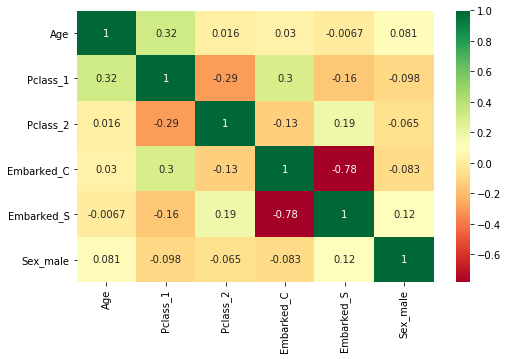

In [29]:
### Lets plot the correlation matrix

Selected_features = ['Age','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male']

X = final_train[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [30]:
### Last few lines
!pip install scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [31]:
## create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

In [32]:
# Use train/test split with different random_state values
# We can change the random_state values that can change the accuracy scores
# The score change a lot , this is why testing scores is a high variance estimate

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [34]:
# Check classification scores of logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[ fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results')

Train/Test split results
